In [1]:
#| default_exp simulation

# simulation

In [2]:
#| export


import scrappy
import numpy as np


In [3]:
#| export

EPS=1e-6

In [4]:
#| export

def sequence_to_squiggle(sequence, model='squiggle_r94_rna'):
    '''
    sequence_to_squiggle convert a sequence to a squiggle signal


    Args:
        sequence (_type_): sequence which only contains A, C, G, T
        model (str, optional):  Defaults to 'squiggle_r94_rna'.

    Returns:
        numpy.array : squiggle signal
    '''

    signals = scrappy.sequence_to_squiggle(
        sequence,
        model=model,
        rescale=True).data(as_numpy=True, sloika=False)
    return signals


In [5]:
#| export

def get_target_signal(scrappy_signals,start=0, end=None):
    '''
    target_signal get the target signal from the raw scrappy signal


    Args:
        scrappy_signals (_type_): _description_
        start (_type_, optional): _description_. Defaults to None.
        end (_type_, optional): _description_. Defaults to None.
    '''
    if None is end:
        end = scrappy_signals.shape[0]
    t_signal = np.repeat(scrappy_signals[start:end, 0], np.ceil(
        scrappy_signals[start:end, 2]).astype(int))
    
    return (t_signal-t_signal.mean())/(t_signal.std()+EPS)


In [6]:
import matplotlib.pyplot as plt
import random

In [7]:
padding_length = 10
alphabet = ['A','T','C','G']
seq_length = 21

seq = ''.join([random.choice(alphabet) for i in range(seq_length)])
print(seq)

GAGCCGTCTAGGTTCATCGTG


In [11]:
def plot_signal(seq,ax,padding=0,color='blue',vlines=True,lw=3):
    raw_seq = seq
    signal = sequence_to_squiggle(seq,)
    if padding >0:
        signal = signal[padding:-padding]
        seq = raw_seq[padding:-padding]
    ax.plot(get_target_signal(signal), color=color, label=raw_seq, lw=lw)
    loc = 0
    if vlines:
        for idx, dwell in enumerate([np.ceil(i) for i in signal[:, 2]]):
            ax.vlines(loc, -2, 2, color='red', alpha=0.5)
            ax.text(loc+dwell/2, -2, seq[idx], ha='center', va='center', fontsize=12)
            loc += dwell
        ax.vlines(loc, -2, 2, color='red', alpha=0.5)
    
        if padding ==0:
            ax.set_title(raw_seq)
        else:
            ax.set_title(raw_seq[:padding]+'|'+raw_seq[padding:-padding]+'|'+raw_seq[-padding:])
    return ax 


In [12]:
colors = ['blue','green','orange','purple','pink','gray','brown','yellow']

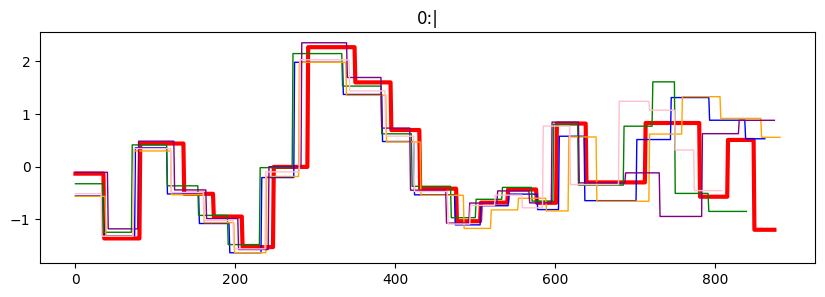

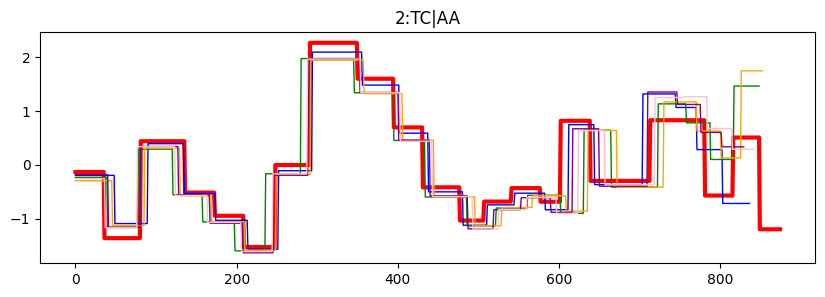

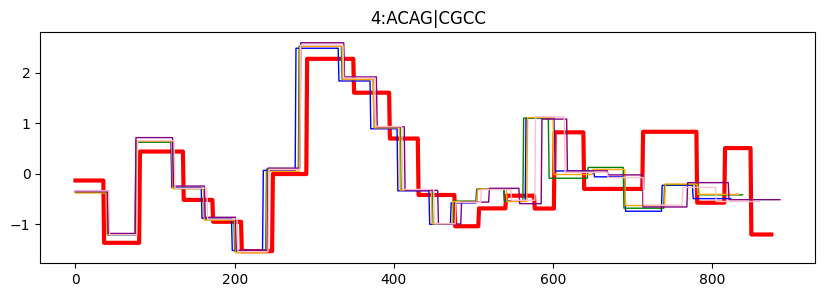

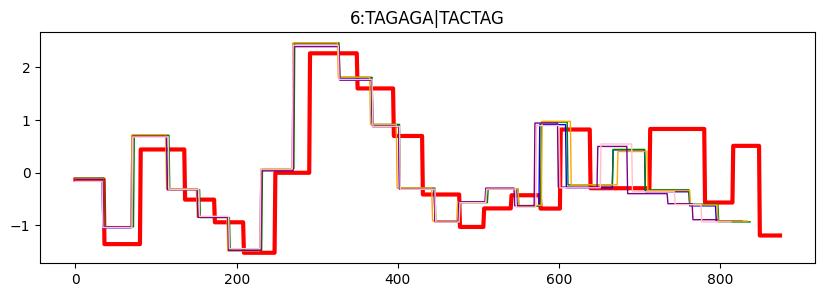

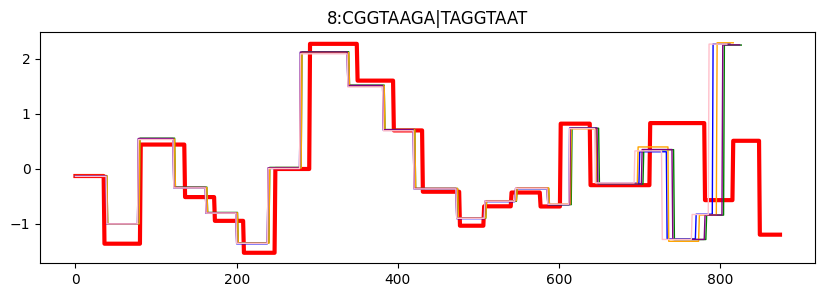

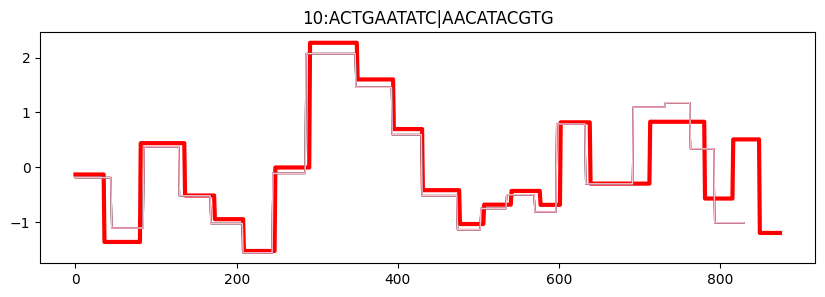

In [13]:

n=0
for length in range(6):
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    length = length*2
    head = [random.choice(alphabet) for i in range(length)]
    tail = [random.choice(alphabet) for i in range(length)]
    ax = plot_signal(seq, ax,color='red',vlines=False)

    for i in range(5):
        if padding_length > length:
            header = ''.join([random.choice(alphabet)
                             for i in range(padding_length-length)]+head)
            tailer = ''.join(tail+[random.choice(alphabet)
                             for i in range(padding_length-length)])
        else:
            header = ''.join(head)
            tailer = ''.join(tail)
        tmp_seq =  header + seq + tailer
        ax = plot_signal(tmp_seq, ax, padding_length, vlines=False,color=colors[i],lw=1)
    ax.set_title(f'{length}:{"".join(head)}|{"".join(tail)}')
    n+=1
    # fig.savefig(f'./tmp/{n}.pdf',dpi=300)

